In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print('my CUNI ID is: 51522660')
dfADBE = pd.read_csv('data/ADBE.csv')
dfHIG = pd.read_csv('data/HIG.csv')
dfICE = pd.read_csv('data/ICE.csv')
dfKEYS = pd.read_csv('data/KEYS.csv')
dataframes = {
    "ADBE" : dfADBE,
    "HIG" : dfHIG, 
    "ICE" : dfICE, 
    "KEYS" : dfKEYS
}

# Convert to datetime
for ticker in dataframes:
    dataframes[ticker]['Date'] = pd.to_datetime(dataframes[ticker]['Date'])
    dataframes[ticker].set_index('Date', inplace=True)

#Task 1.1
tickers = []
for ticker in dataframes:
    if dataframes[ticker]['Close'].equals(dataframes[ticker]['Adj Close']):
        tickers.append(ticker)
if tickers:
  print('The companies that have no difference between the Close and Adj Close columns are:', tickers)
  print('From a financial point of view it means that nothing has happened that would require an adjustment to the closing price.')
else:
  print('No company has no difference between the Close and Adj Close columns')
    




my CUNI ID is: 51522660
The companies that have no difference between the Close and Adj Close columns are: ['ADBE', 'KEYS']
From a financial point of view it means that nothing has happened that would require an adjustment to the closing price.


In [124]:
#Task 1.2
for ticker in dataframes:
    print('The highest price for ' + ticker + ': ', dataframes[ticker]['Adj Close'].max())
    print('The lowest price for ' + ticker + ': ', dataframes[ticker]['Adj Close'].min())

The highest price for ADBE:  688.3699951171875
The lowest price for ADBE:  167.5399932861328
The highest price for HIG:  75.3499984741211
The lowest price for HIG:  24.926820755004883
The highest price for ICE:  138.47097778320312
The lowest price for ICE:  62.55546951293945
The highest price for KEYS:  207.92999267578125
The lowest price for KEYS:  41.540000915527344


In [125]:
#Task 1.3
# This dictionary is to be used for task 1.7
log_returns = {}
for ticker in dataframes:
    adj_close = dataframes[ticker]['Adj Close']
    prev_adj_close = dataframes[ticker]['Adj Close'].shift(1)
    returns = np.log(adj_close / prev_adj_close)
    
    min_return = returns.min()
    max_return = returns.max()
    mean_return = returns.mean()
    median_return = returns.median()

    log_returns[ticker] = returns

    print("Minimum Return for " + ticker + ": ", min_return)
    print("Maximum Return for " + ticker + ": ", max_return)
    print("Mean Return for " + ticker + ": ", mean_return)
    print("Median Return for " + ticker + ": ", median_return)


Minimum Return for ADBE:  -0.183840752745506
Maximum Return for ADBE:  0.16313277614308605
Mean Return for ADBE:  0.0005001113198521252
Median Return for ADBE:  0.001977440642605713
Minimum Return for HIG:  -0.23842911971913933
Maximum Return for HIG:  0.24447614182678484
Mean Return for HIG:  0.00030651048614499586
Median Return for HIG:  0.0006781987661181753
Minimum Return for ICE:  -0.13108146207851
Maximum Return for ICE:  0.09700877446378152
Mean Return for ICE:  0.00039458633431432773
Median Return for ICE:  0.0009221013592368512
Minimum Return for KEYS:  -0.10851244129962792
Maximum Return for KEYS:  0.11845589936547976
Mean Return for KEYS:  0.0010787793029716725
Median Return for KEYS:  0.001573297434269001


In [126]:
#Task 1.4
for ticker in dataframes:
    returns = np.log(dataframes[ticker]['Adj Close'] /  dataframes[ticker]['Adj Close'].shift(1))
    max_gain_date = returns.idxmax()
    max_loss_date = returns.idxmin()


    print("The date with the highest gain for", ticker, ":", max_gain_date.date())
    print("The date with the highest loss for", ticker, ":", max_loss_date.date())

The date with the highest gain for ADBE : 2020-03-13
The date with the highest loss for ADBE : 2022-09-15
The date with the highest gain for HIG : 2020-03-19
The date with the highest loss for HIG : 2020-03-16
The date with the highest gain for ICE : 2020-03-24
The date with the highest loss for ICE : 2020-03-12
The date with the highest gain for KEYS : 2019-08-22
The date with the highest loss for KEYS : 2020-03-12


In [127]:
#Task 1.5
for ticker in dataframes:
    weekly_volume = dataframes[ticker]['Volume'].resample('W').mean()
    avg_weekly_volume = weekly_volume.mean()
    
    print("The average weekly volume for", ticker, "is: ", avg_weekly_volume)

The average weekly volume for ADBE is:  2975620.6896551726
The average weekly volume for HIG is:  2293746.2835249044
The average weekly volume for ICE is:  2725362.681992337
The average weekly volume for KEYS is:  1352019.214559387


In [128]:
#Task 1.6
total_returns = {}

for ticker in dataframes:
    first = dataframes[ticker].iloc[0]['Adj Close']
    last = dataframes[ticker].iloc[-1]['Adj Close']
    
    total_return = (last - first) / first
    total_returns[ticker] = total_return

max_return_ticker = ""
max_return = 0 
for ticker, val in total_returns.items():
    if val > max_return:
        max_return_ticker = ticker
        

print("The company with the highest total return is:", max_return_ticker)


The company with the highest total return is: KEYS


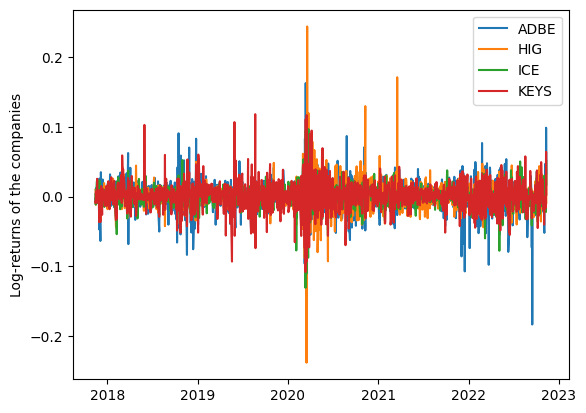

In [129]:
# Task 1.7 and Task 1.8
for ticker in log_returns:
    plt.plot(log_returns[ticker], label=ticker)

plt.legend()
plt.ylabel('Log-returns of the companies')
plt.show()

In [130]:
# Task 2.1
df2 = pd.read_csv('companies_no_subindustry.csv')

print(df2['included'].isna().sum(), "companies do not have filled-in the date of inclusion to S&P 500.")

45 companies do not have filled-in the date of inclusion to S&P 500.


In [132]:
#Task 2.2
dropped_included = df2.dropna(subset=['included']).copy()

dropped_included['included_date'] = pd.to_datetime(dropped_included['included'], dayfirst=True, errors='coerce')

# We assume the age based on if it were the age today
current_year = pd.Timestamp('today').year

dropped_included['included_year'] = dropped_included['included_date'].dt.year
dropped_included['age'] = current_year - dropped_included['included_year']

oldest = dropped_included.loc[dropped_included['age'].idxmax()]['Security']
youngest = dropped_included.loc[dropped_included['age'].idxmin()]['Security']

average_age = dropped_included['age'].mean()

print("The oldest constituent is", oldest)
print("The youngest constituent is", youngest)
print("The average age of the constituents is", average_age)

The oldest constituent is Altria
The youngest constituent is Arch Capital Group
The average age of the constituents is 23.074725274725274


In [ ]:
# Task 2.3
